In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./data_i.csv')
data.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0


# Best Features

In [3]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

In [6]:
X = data[Feature_Selection]
y = data['Type_mine']

# Holdout

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state = 1234)

In [8]:
model = svm.SVC()

In [9]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_pred = model.predict(X_test)

([<matplotlib.axis.YTick at 0x1e027069b70>,
 <a list of 2 Text yticklabel objects>)

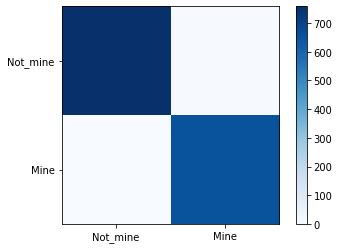

In [16]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [17]:
churm

array([[758,   5],
       [  0, 657]], dtype=int64)

In [18]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.accuracy_score(y_test, y_pred))

Exactitud:  0.9964788732394366
Kappa:  0.9964788732394366


In [19]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Precisión     :  0.9924471299093656
Recall        :  1.0
Especificidad :  0.9924471299093656
F1-score      :  0.9962092494313874


In [20]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VN = np.sum(churm[1:3,1:3])
FP = np.sum(churm[0,1:3])
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  1.0
Recall        :  0.9934469200524246
Especificidad :  0.9924471299093656
F1-score      :  0.9967126890203813
